In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset
# Display the data table for preview
lab_rats = pd.merge(mouse_metadata, study_results, on="Mouse ID",suffixes = ("Metadata", "Study"))
lab_rats

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
len(lab_rats['Mouse ID'].value_counts())

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#find duplicate mouse ID values
dupes = lab_rats.drop_duplicates(subset=['Mouse ID','Timepoint'], keep = False)
dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_IDs = dupes['Mouse ID'].unique()

In [8]:
# Checking the number of mice in the clean DataFrame.
len(mouse_IDs)

249

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties 
#of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_data = lab_rats.groupby('Drug Regimen')['Tumor Volume (mm3)']
tumor_mean = tumor_data.mean()
tumor_median = tumor_data.median()
tumor_variance = tumor_data.var()
tumor_sd = tumor_data.std()
tumor_SEM = tumor_data.sem()
tumor_stats = pd.DataFrame({"Mean" : tumor_mean, "Median" : tumor_median,
                            "Variance" :tumor_variance,"Standard Deviation":tumor_sd,
                            "SEM" :tumor_SEM})
tumor_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Using the aggregation method, produce the same summary statistics in a single line
aggregation = tumor_data.aggregate(['mean', 'median','var','std', 'sem'])
aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


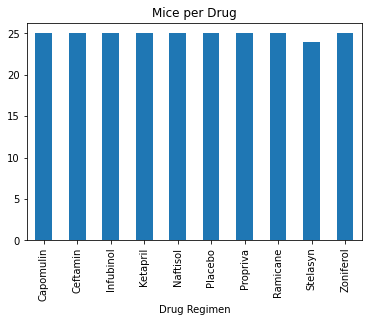

In [50]:
# Generate a bar plot showing the total number of measurements taken on 
#each drug regimen using pandas.
measurements = dupes.drop_duplicates(subset=['Mouse ID'], keep = "last")
measurement_data = measurements.groupby('Drug Regimen')
measurement_data = measurement_data['Mouse ID'].count()
measurement_data.plot(kind="bar", title = "Mice per Drug")
plt.show()

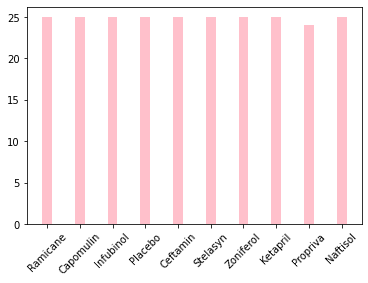

In [56]:
# Generate a bar plot showing the total number of measurements taken 
#on each drug regimen using pyplot.
drugs = measurements['Drug Regimen'].unique()

plt.bar(drugs, measurement_data,color = 'pink', width = .3)
plt.xticks(rotation=45)
plt.show()


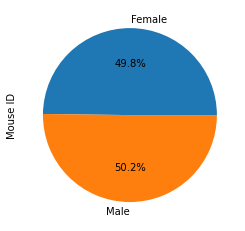

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
f_v_m = dupes.drop_duplicates(subset=['Mouse ID'], keep = "last").groupby('Sex')
f_v_m = f_v_m['Mouse ID'].count()
f_v_m.plot(kind="pie",subplots = True, autopct='%1.1f%%')
plt.show()


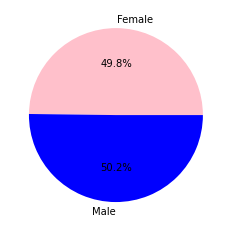

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(f_v_m['Mouse ID'], labels = ("Female", "Male"),colors = ('Pink', 'Blue'), autopct='%1.1f%%')
plt.show()

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = lab_rats.sort_values(by=['Timepoint'])
last_timepoint = last_timepoint.drop_duplicates(subset='Mouse ID', keep="last")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1551,t573,Ceftamin,Female,15,27,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1599,v199,Naftisol,Female,17,29,0,45.000000,0
1163,l872,Placebo,Male,19,30,0,45.000000,0
...,...,...,...,...,...,...,...,...
174,a644,Ramicane,Female,7,17,45,32.978522,1
679,c402,Stelasyn,Female,1,27,45,74.040390,3
689,c559,Zoniferol,Female,19,28,45,61.840058,4
706,c757,Placebo,Male,9,27,45,69.042841,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = last_timepoint['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

In [29]:
# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_volume = last_timepoint['Tumor Volume (mm3)']
    tumor_data.append({"Drug Regimen" : treatment, "Tumor Volume" : tumor_volume})
tumor_data

[{'Drug Regimen': 'Ceftamin',
  'Tumor Volume': 1551    45.000000
  1583    45.000000
  594     45.000000
  1599    45.000000
  1163    45.000000
            ...    
  174     32.978522
  679     74.040390
  689     61.840058
  706     69.042841
  1892    73.867845
  Name: Tumor Volume (mm3), Length: 249, dtype: float64},
 {'Drug Regimen': 'Naftisol',
  'Tumor Volume': 1551    45.000000
  1583    45.000000
  594     45.000000
  1599    45.000000
  1163    45.000000
            ...    
  174     32.978522
  679     74.040390
  689     61.840058
  706     69.042841
  1892    73.867845
  Name: Tumor Volume (mm3), Length: 249, dtype: float64},
 {'Drug Regimen': 'Placebo',
  'Tumor Volume': 1551    45.000000
  1583    45.000000
  594     45.000000
  1599    45.000000
  1163    45.000000
            ...    
  174     32.978522
  679     74.040390
  689     61.840058
  706     69.042841
  1892    73.867845
  Name: Tumor Volume (mm3), Length: 249, dtype: float64},
 {'Drug Regimen': 'Propriva',

In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# add subset     
box_data = last_timepoint.groupby('Drug Regimen')
box_plot = box_data['Tumor Volume (mm3)'].describe()
box_iqr = box_plot['75%'] - box_plot['25%']
box_plot['IQR'] = box_iqr
box_plot['Upper Bound'] = box_plot['25%'] - (1.5*box_plot['IQR'])
box_plot['Lower Bound'] = box_plot['75%'] + (1.5*box_plot['IQR'])
box_plot

,count,mean,std,min,25%,50%,75%,max,IQR,Upper Bound,Lower Bound
Drug Regimen,,,,,,,,,,,
Capomulin,25.0,36.667568,5.715188,23.343598,32.377357,38.125164,40.159220,47.685963,7.781863,20.704562,51.832015
Ceftamin,25.0,57.753977,8.365568,45.000000,48.722078,59.851956,64.299830,68.923185,15.577752,25.355450,87.666458
Infubinol,25.0,58.178246,8.602957,36.321346,54.048608,60.165180,65.525743,72.226731,11.477135,36.832905,82.741446
Ketapril,25.0,62.806191,9.945920,45.000000,56.720095,64.487812,69.872251,78.567014,13.152155,36.991862,89.600484
Naftisol,25.0,61.205757,10.297083,45.000000,52.079510,63.283288,69.563621,76.668817,17.484111,25.853344,95.789787
Placebo,25.0,60.508414,8.874672,45.000000,52.942902,62.030594,68.134288,73.212939,15.191386,30.155822,90.921368
Propriva,25.0,56.736964,8.327605,45.000000,49.122969,55.841410,62.570880,72.455421,13.447911,28.951103,82.742746
Ramicane,25.0,36.191390,5.671539,22.050126,31.560470,36.561652,40.659006,45.220869,9.098537,17.912664,54.306811
Stelasyn,24.0,61.001707,9.504293,45.000000,52.476596,62.192350,69.103944,75.123690,16.627349,27.535572,94.044968


In [26]:
# Determine outliers using upper and lower bounds
outliers=[]

for treatment in treatments: 
    for mouse in last_timepoint:
        drug = last_timepoint['Drug Regimen'].astype(str)
        upperbound = box_plot.loc[treatment,'Upper Bound']
        lowerbound = box_plot.loc[treatment,'Lower Bound']  
        
    try:
        if drug == treatment:
            last_timepoint['Upper Bound'] = upperbound
            last_timepoint['Lower Bound'] = lowerbound
    except:
        print('Nada')
        print(mouse)
        print(treatment)
last_timepoint
      
        
   
    
  


Nada
Metastatic Sites
Ceftamin
Nada
Metastatic Sites
Naftisol
Nada
Metastatic Sites
Placebo
Nada
Metastatic Sites
Propriva
Nada
Metastatic Sites
Zoniferol
Nada
Metastatic Sites
Ketapril
Nada
Metastatic Sites
Stelasyn
Nada
Metastatic Sites
Ramicane
Nada
Metastatic Sites
Infubinol
Nada
Metastatic Sites
Capomulin


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1551,t573,Ceftamin,Female,15,27,0,45.000000,0
1583,u153,Ceftamin,Female,11,25,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1599,v199,Naftisol,Female,17,29,0,45.000000,0
1163,l872,Placebo,Male,19,30,0,45.000000,0
...,...,...,...,...,...,...,...,...
174,a644,Ramicane,Female,7,17,45,32.978522,1
679,c402,Stelasyn,Female,1,27,45,74.040390,3
689,c559,Zoniferol,Female,19,28,45,61.840058,4
706,c757,Placebo,Male,9,27,45,69.042841,3


In [ ]:
test = last_timepoint[last_timepoint['Tumor Volume (mm3)'].between(box_plot.loc['Ramicane','Upper Bound'], box_plot.loc['Ramicane','Lower Bound']) == False]
test


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
